In [4]:
#### import libraries and data to conduct AB test

import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind as ttest
import matplotlib.pyplot as plt

redesign = pd.read_csv('http://www.halsnarr.com/excel/abtesting%20data.csv')

pA = pd.DataFrame((redesign.iloc[:, [2]].values))
pB = pd.DataFrame((redesign.iloc[:, [5]].values))
sA = pd.DataFrame((redesign.iloc[:, [1]].values))
sB = pd.DataFrame((redesign.iloc[:, [4]].values))

# delete missing rows
pA.dropna(inplace = True)
pB.dropna(inplace = True)
sA.dropna(inplace = True)
sB.dropna(inplace = True)

### PRINT TEST RESULTS FOR ###
#      Ha: Pa - Pb > 0       #
#      Ha: Ma - Mb > 0       #
##############################

      personA  secondsA  purchaseA  personB  secondsB  purchaseB
0           1       670          0        1     660.0        0.0
1           2       610          0        2     460.0        0.0
2           3       460          0        3     359.0        0.0
3           4       350          0        4     350.0        0.0
4           5       240          0        5     420.0        0.0
...       ...       ...        ...      ...       ...        ...
5995     5996        30          0     5996       NaN        NaN
5996     5997         5          0     5997       NaN        NaN
5997     5998       108          0     5998       NaN        NaN
5998     5999        29          0     5999       NaN        NaN
5999     6000       113          0     6000       NaN        NaN

[6000 rows x 6 columns]


t-stat = 2.273768456171478
  t-cv = 1.645047365791167
  p-value = 0.0115
    df = 7866


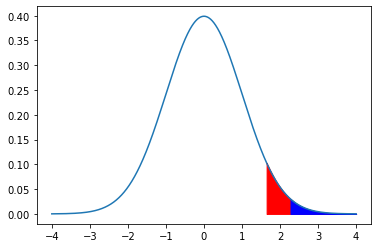

In [9]:
a=0.05
Tst = ((np.mean(sB)-np.mean(sA))/np.sqrt(np.std(sB)**2/len(sB)+np.std(sA)**2/len(sA)))[0]
DF  = int((np.std(sB)**2/len(sB)+np.std(sA)**2/len(sA))**2   / 
          ((np.std(sB)**2/len(sB))**2/(len(sB)-1)+(np.std(sA)**2/len(sA))**2/(len(sA)-1)))
Tcv = t.ppf(1-a, df=DF)
pvl = round(t.sf(Tst,df=DF),4)   # p-value using the t distribution
print('t-stat =',Tst)
print('  t-cv =',Tcv)
print('  p-value =',pvl)
print('    df =',DF)

### Visualize the result of the t-test
T = np.arange(-4,4,.001)
plt.plot(T, t.pdf(T,df=DF))
plt.fill_between(T[T>Tcv], t.pdf(T[T>Tcv],df=DF), color='red' )
plt.fill_between(T[T>Tst], t.pdf(T[T>Tst],df=DF), color='blue' )
plt.show()

normal distribution p-value = 0.0115
     t distribution p-value = 0.0115


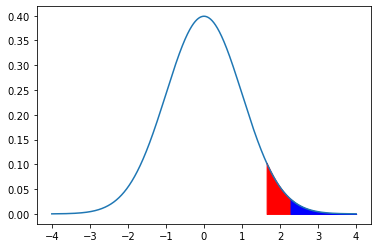

In [10]:

PVL = round(norm.sf(Tst),4)      # p-value using the standard norm distribution

print('normal distribution p-value =',PVL) # p-value using the standard norm distribution

print('     t distribution p-value =',pvl) # p-value using the standard t distribution


plt.plot(T, norm.pdf(T))
plt.fill_between(T[T>Tcv], norm.pdf(T[T>Tcv]), color='red' )
plt.fill_between(T[T>Tst], norm.pdf(T[T>Tst]), color='blue' )
plt.show()


2.273516906807699
0.01151094095314378
t-stat = 2.274
 p-val = 0.0115


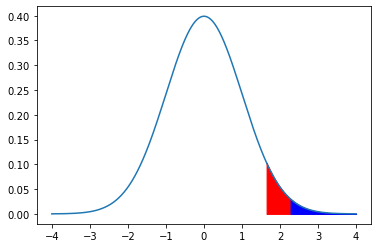

In [13]:

Test = ttest(sB, sA, equal_var = False) #we dont if the variance are same
print(Test[0][0])
print(Test[1][0]/2)
Tst  = round(Test[0][0]  ,3)
Pvl  = round(Test[1][0]/2,4)
print('t-stat =' , Tst)
print(' p-val =' , Pvl) 

### With BIG DATA, you can just use the standard normal distribution 
T   = np.arange(-4,4,.001)
Tcv = norm.ppf(1-.05)
plt.plot(T, norm.pdf(T))
plt.fill_between(T[T>Tcv], norm.pdf(T[T>Tcv]), color='red' )
plt.fill_between(T[T>Tst], norm.pdf(T[T>Tst]), color='blue' )
plt.show()

t-stat = 1.843
 p-val = 0.0327
Purch A = 90.0
 cr A = 1.5
Purch B = 80.0
 cr B = 2.0


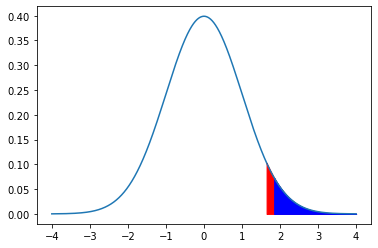

In [25]:
### Use python's t-test to conduct same test

crA = np.mean(pA)[0]
crB = np.mean(pB)[0]

nA = crA*len(pA)
nB = crB*len(pB)

Test = ttest(pB, pA, equal_var = False)

Tst  = round(Test[0][0]  ,3)
Pvl  = round(Test[1][0]/2,4)
print('t-stat =' , Tst   )
print(' p-val =' , Pvl   ) 
print('Purch A =', nA    ) 
print(' cr A =' , crA*100) 
print('Purch B =', nB    ) 
print(' cr B =' , crB*100) 

### Since t With BIG DATA, you can just use the standard normal distribution 
T   = np.arange(-4,4,.001)
Tcv = norm.ppf(1-.05)
plt.plot(T, norm.pdf(T))
plt.fill_between(T[T>Tcv], norm.pdf(T[T>Tcv]), color='red' )
plt.fill_between(T[T>Tst], norm.pdf(T[T>Tst]), color='blue' )
plt.show()